In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [166]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [167]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [168]:
strings_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [169]:
for col in strings_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [170]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


# EDA

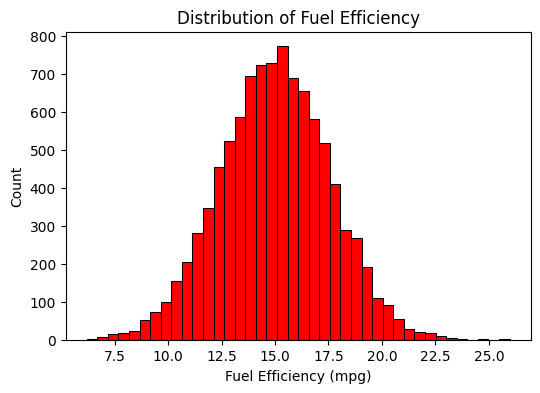

In [171]:
plt.figure(figsize=(6,4))
sns.histplot(df.fuel_efficiency_mpg, bins=40, color='red', alpha=1)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Count')
plt.title('Distribution of Fuel Efficiency')
plt.show()

# Linear Regression

In [172]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# Prepare X

In [173]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# RMSE

In [127]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Base

In [190]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Q1 - missing values

In [199]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

# Q2 - horsepower median

In [202]:
df['horsepower'].median()

np.float64(149.0)

# Preparing the dataset

In [175]:
np.random.seed(42)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Q3 - Mean vs 0's

### Mean

In [176]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

mean_value = df_train_mean['horsepower'].mean()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_value)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_value)
df_test_mean['horsepower'] = df_test_mean['horsepower'].fillna(mean_value)

In [177]:
y_train_mean = df_train_mean.fuel_efficiency_mpg.values
y_val_mean = df_val_mean.fuel_efficiency_mpg.values
y_test_mean = df_test_mean.fuel_efficiency_mpg.values

del df_train_mean['fuel_efficiency_mpg']
del df_val_mean['fuel_efficiency_mpg']
del df_test_mean['fuel_efficiency_mpg']

In [181]:
X_train_mean = df_train_mean[base].values
w_0, w = train_linear_regression(X_train_mean, y_train_mean)
y_train_pred_mean = w_0 + X_train_mean.dot(w)
print('mean train:', rmse(y_train_mean, y_train_pred_mean))

mean train: 0.46244121379599645


In [182]:
X_val_mean = df_val_mean[base].values
w_0, w = train_linear_regression(X_val_mean, y_val_mean)
y_val_pred_mean = w_0 + X_val_mean.dot(w)
print('validation:', rmse(y_val_mean, y_val_pred_mean))

validation: 0.4630826400124269


In [186]:
rmse_train_mean = rmse(y_train_mean, y_train_pred_mean)
print(round(rmse_train_mean,2))

0.46


In [187]:
rmse_val_mean = rmse(y_val_mean, y_val_pred_mean)
print(round(rmse_val_mean,2))

0.46


### 0's

In [193]:
mode_value = df_mode['horsepower'].mode()[0]

df_train_mode = df_train.copy()
df_val_mode = df_val.copy()
df_test_mode = df_test.copy()

df_train_mode['horsepower'] = df_train_mode['horsepower'].fillna(mode_value)
df_val_mode['horsepower'] = df_val_mode['horsepower'].fillna(mode_value)
df_test_mode['horsepower'] = df_test_mode['horsepower'].fillna(mode_value)

In [194]:
y_train_mode = df_train_mode.fuel_efficiency_mpg.values
y_val_mode = df_val_mode.fuel_efficiency_mpg.values
y_test_mode = df_test_mode.fuel_efficiency_mpg.values

del df_train_mode['fuel_efficiency_mpg']
del df_val_mode['fuel_efficiency_mpg']
del df_test_mode['fuel_efficiency_mpg']

In [195]:
X_train_mode = df_train_mode[base].values
w_0, w = train_linear_regression(X_train_mode, y_train_mode)
y_train_pred_mode = w_0 + X_train_mode.dot(w)
print('mode train:', rmse(y_train_mode, y_train_pred_mode))

mode train: 0.46245878083993486


In [196]:
X_val_mode = df_val_mode[base].values
w_0, w = train_linear_regression(X_val_mode, y_val_mode)
y_val_pred_mode = w_0 + X_val_mode.dot(w)
print('validation:', rmse(y_val_mode, y_val_pred_mode))

validation: 0.46323493845782787


In [197]:
rmse_train_mode = rmse(y_train_mode, y_train_pred_mode)
print(round(rmse_train_mode,2))

0.46


In [198]:
rmse_val_mode = rmse(y_val_mode, y_val_pred_mode)
print(round(rmse_val_mode,2))

0.46


# Baseline Solution - Mean

In [150]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [152]:
df[base].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

In [124]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [125]:
y_pred = w_0 + X_train.dot(w)

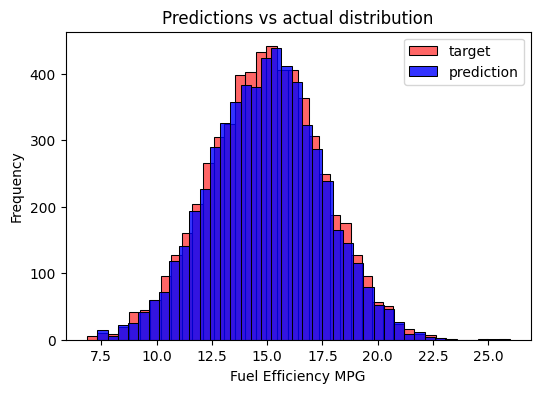

In [126]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency MPG')
plt.title('Predictions vs actual distribution')

plt.show()

In [146]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [147]:
rmse(y_val, y_pred)

np.float64(0.4636019612151065)